In [1]:
import numpy as nu
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Analise exploratoria

In [2]:
base= pd.read_csv('dadosRH.csv')

In [3]:
base.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [4]:
base.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


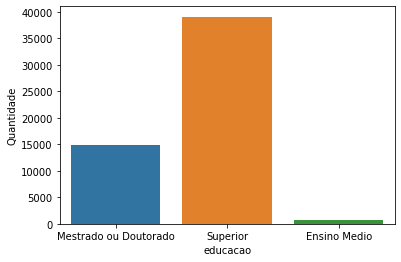

In [255]:
sns.countplot(x = base['educacao'])
plt.ylabel('Quantidade')
plt.show()

In [6]:
base.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


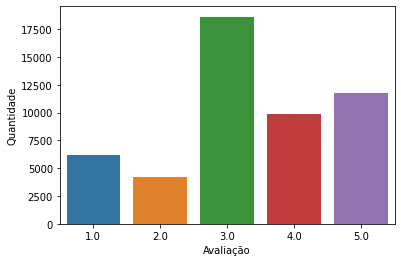

In [254]:
sns.countplot(x = base['aval_ano_anterior'])
plt.xlabel('Avaliação')
plt.ylabel('Quantidade')
plt.show()

In [8]:
base.groupby(['regiao']).count()

,id_funcionario,departmento,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
regiao,,,,,,,,,,
Centro,2234,2234,2230,2234,2234,2234,2234,2079,2234,2234
Nordeste,14571,14571,13958,14571,14571,14571,14571,13175,14571,14571
Norte,4686,4686,4520,4686,4686,4686,4686,4363,4686,4686
Norte0,657,657,644,657,657,657,657,614,657,657
Norte2,945,945,861,945,945,945,945,840,945,945
Norte3,269,269,269,269,269,269,269,260,269,269
Sudeste,12565,12565,12174,12565,12565,12565,12565,11684,12565,12565
Sul,18881,18881,17743,18881,18881,18881,18881,17669,18881,18881


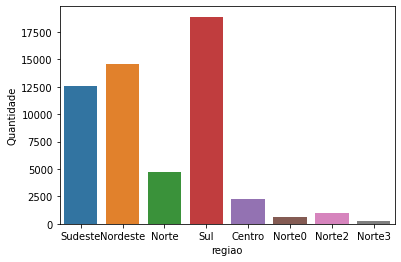

In [256]:
sns.countplot(x = base['regiao'])
plt.ylabel('Quantidade')
plt.show()

In [10]:
base.groupby('genero').count()

,id_funcionario,departmento,regiao,educacao,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
genero,,,,,,,,,,
F,16312,16312,16312,15921,16312,16312,16312,15154,16312,16312
M,38496,38496,38496,36478,38496,38496,38496,35530,38496,38496


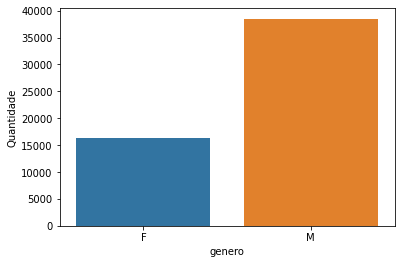

In [258]:
sns.countplot(x = base.genero)
plt.ylabel('Quantidade')
plt.show()

In [12]:
base['educacao'].fillna(base['educacao'].mode()[0],inplace=True)

In [13]:
base.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,46355,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4329,4668


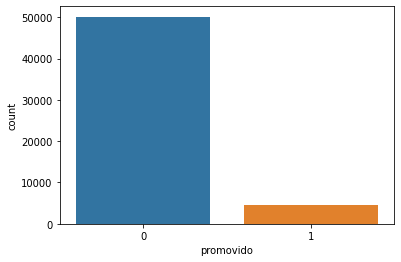

In [261]:
sns.countplot(x = base['promovido'])
plt.show()

In [15]:
df_minoritaria = base[base['promovido']==1] 
df_majoritaria = base[base['promovido']==0]

In [16]:
from sklearn.utils import resample

In [17]:
df_min_samp = resample(
    df_minoritaria,
    replace=True,
    n_samples= df_majoritaria .shape[0],
    random_state= 150
)

In [18]:
df_min_samp.shape

(50140, 11)

In [19]:
df = pd.concat([df_majoritaria, df_min_samp])

In [20]:
df.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

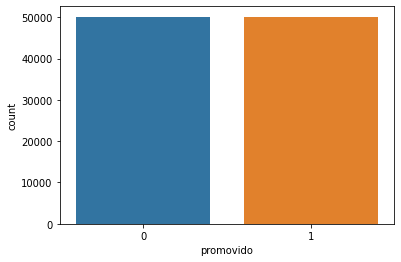

In [262]:
sns.countplot(x = df.promovido)
plt.show()

In [22]:
df.to_csv('dados.csv', encoding='utf-8', index=False)

In [23]:
df = pd.read_csv('dados.csv')

In [24]:
df

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
100275,17132,Analytics,Norte,Superior,M,Outro,1,27,NaN,1,1
100276,75177,Logistica,Sul,Superior,M,Outsourcing,2,47,5.0,6,1
100277,74185,Logistica,Norte2,Superior,M,Outsourcing,1,30,3.0,5,1
100278,5261,Contabilidade,Sul,Superior,M,Outsourcing,1,29,2.0,4,1


## Pergunta 1: Qual a correlação entre as variaveis

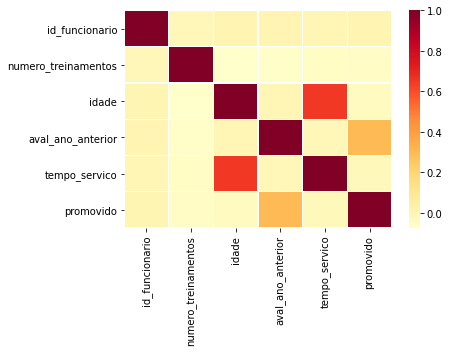

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
correlacao = df.corr()
sns.heatmap(correlacao, cmap = 'YlOrRd', linewidths = 0.1)
plt.show()

## Pergunta 2: Qual o tempo de serviço da maioria dos funcionarios

/home/bernardo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


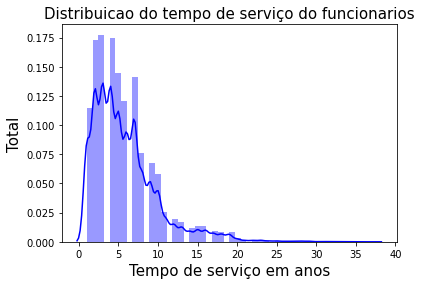

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['tempo_servico'],color='blue')
plt.title('Distribuicao do tempo de serviço do funcionarios', fontsize=15)
plt.xlabel('Tempo de serviço em anos', fontsize=15)
plt.ylabel('Total' ,fontsize=15)
plt.show()

## Pergunta 3: Qual avaliação do ano anterior foi mais comum

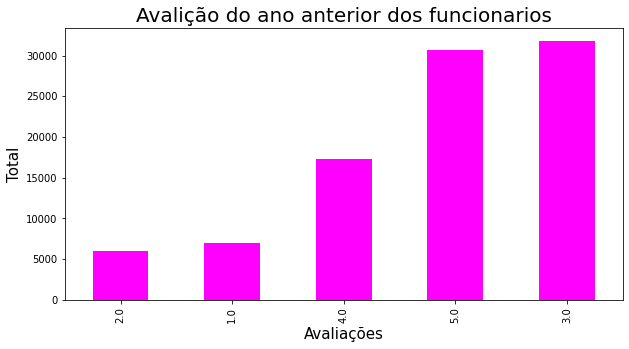

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
df['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'magenta',figsize=(10, 5))
plt.title('Avalição do ano anterior dos funcionarios', fontsize=20)
plt.xlabel('Avaliações', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

## Pergunta 4: Qual adistribuicao de idade dos funcionarios

/home/bernardo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


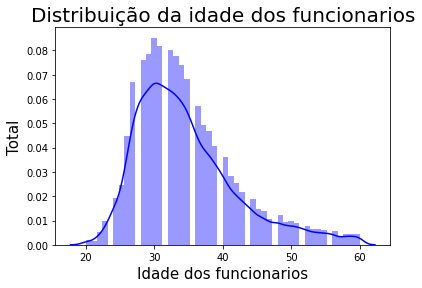

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['idade'],color='blue')
plt.title('Distribuição da idade dos funcionarios', fontsize=20)
plt.xlabel('Idade dos funcionarios', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

## Pergunta 5: Qual o numero de treinamento mais frequente

/home/bernardo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


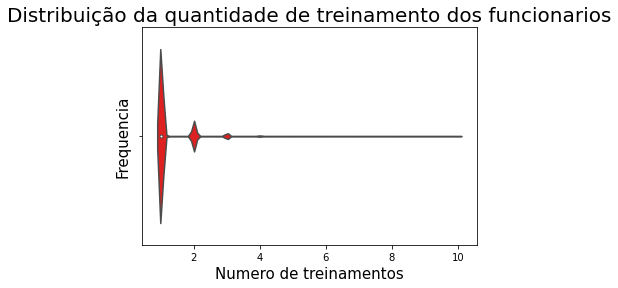

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(df['numero_treinamentos'],color='red')
plt.title('Distribuição da quantidade de treinamento dos funcionarios', fontsize=20)
plt.xlabel('Numero de treinamentos', fontsize=15)
plt.ylabel('Frequencia', fontsize=15)
plt.show()

## Pergunta 6: Qual o numero de funcionarios por canal de recrutamento

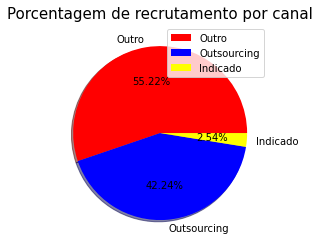

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df['canal_recrutamento'].value_counts()
fatias = data.values
labs = data.index
cores = ['red','blue','yellow']
explode =[0,0,0]
plt.pie(fatias, labels = labs,colors=cores,explode = explode, shadow = True, autopct='%.2f%%')
plt.title('Porcentagem de recrutamento por canal', fontsize=15)
plt.axis('off')
plt.legend()
plt.show()


## Pergunta 7: Qual a relação entre a promoção e a avaliação anterior

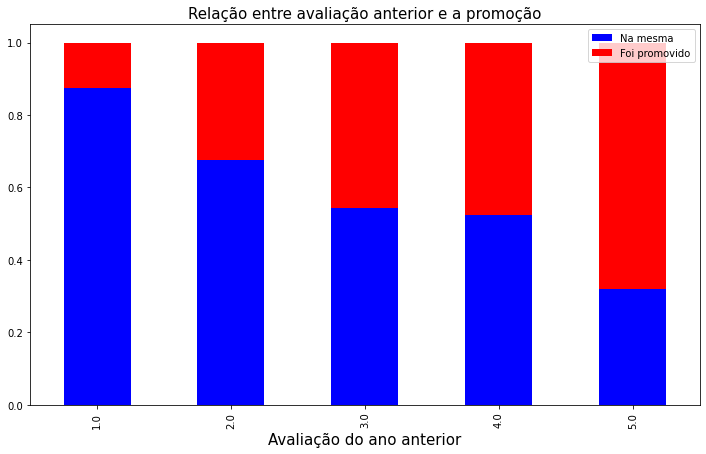

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pf
data = pd.crosstab(df['aval_ano_anterior'],df['promovido'])
data = data.div(data.sum(1).astype(float), axis =0).plot(kind = 'bar',
        stacked = True,
        figsize=(12,7),
        color = ['blue','red']
        )
plt.title('Relação entre avaliação anterior e a promoção', fontsize=15)
plt.xlabel('Avaliação do ano anterior', fontsize=15)
plt.legend(['Na mesma','Foi promovido'])
plt.show()